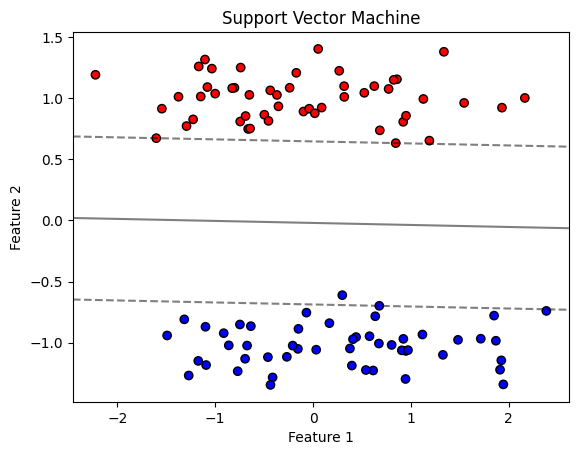

[[12  0]
 [ 0  8]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         8

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Generating synthetic data
# Ensure the sum of n_informative, n_redundant and n_repeated is less than n_features
# Set n_clusters_per_class to 1 to satisfy the constraint
X, y = make_classification(n_samples=100, n_features=2, n_classes=2, n_informative=1, n_redundant=0, n_repeated=0, random_state=0, n_clusters_per_class=1)

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the model
model = SVC(kernel='linear')
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Visualization
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k')
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create grid to evaluate model
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 500),
                     np.linspace(ylim[0], ylim[1], 500))
Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
plt.title('Support Vector Machine')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Evaluating the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))